In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from collections import Counter
import matplotlib.pyplot as plt

# 1.3. Position Estimation (p.27)
- mean 종류 : 평균(x bar), 절사평균, 가중평균

In [ ]:
heights = pd.read_csv('/content/drive/MyDrive/Colab_Note/csv/president_heights.csv')

In [ ]:
heights = pd.DataFrame(heights)
heights.head()

,order,name,height
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183


In [ ]:
heights.mean()

<ipython-input-31-e29667fd5649>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  heights.mean()


order      23.522727
height    180.045455
dtype: float64

In [ ]:
# 절사 평균 : 양 끝에서 N만큼을 잘라낸 값들의 mean
stats.trim_mean(heights['height'], 0.1)

180.19444444444446

In [ ]:
# 표준 편차(std, SD) : Stndard Deviation
np.std(heights)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3571: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


order     13.572178
height     6.983599
dtype: float64

# 1.4. 변이 추정 (p.33)
- 편차(Deviation), 분산(Variance), 표준편차(Standard Deviation, SD), 백분위수(Percentile)
- 사분위범위(IQR, InterQuartile Range) : gap between 75% and 25%

In [ ]:
california = pd.read_csv('/content/california_cities.csv')

In [ ]:
california = pd.DataFrame(california)

In [ ]:
california.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [ ]:
# SD (stadard Deviation)
california['population_total'].std()

203204.09667585458

In [ ]:
# IQR
california['population_total'].quantile(0.75) - california['population_total'].quantile(0.25)

55564.5

# 1.5. Search Data Destribution
- boxplot(상자그림) : 대략적인 분포를 간단하게 시각화함
- frequency table(도수 분포표)  data frequency visualiztion based on interval bin

In [ ]:
heights['height'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    168.30
0.25    174.75
0.50    182.00
0.75    183.50
0.95    190.70
Name: height, dtype: float64

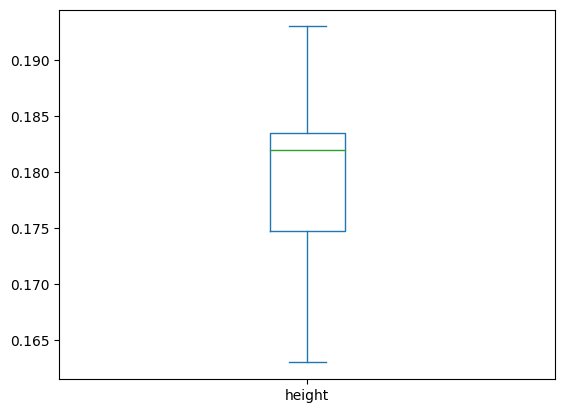

In [ ]:
# bar plot 시각화. tick을 1_000(1,000)으로 나눠서 표시할 수도 있음
# 빗금쳐진 곳이 mean
ax = (heights['height'] / 1_000).plot.box()

In [ ]:
# 10개 구간으로 분할
bin_pop = pd.cut(heights['height'], 10)
# value_counts() : 각 interval에 몇 개의 value가 있는가
bin_pop.value_counts()

(181.0, 184.0]     13
(172.0, 175.0]      7
(175.0, 178.0]      5
(187.0, 190.0]      5
(169.0, 172.0]      3
(184.0, 187.0]      3
(190.0, 193.0]      3
(166.0, 169.0]      2
(178.0, 181.0]      2
(162.97, 166.0]     1
Name: height, dtype: int64

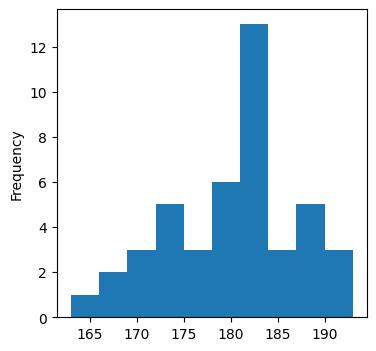

In [ ]:
ax = (heights['height']).plot.hist(figsize=(4, 4))

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


<Axes: ylabel='Density'>

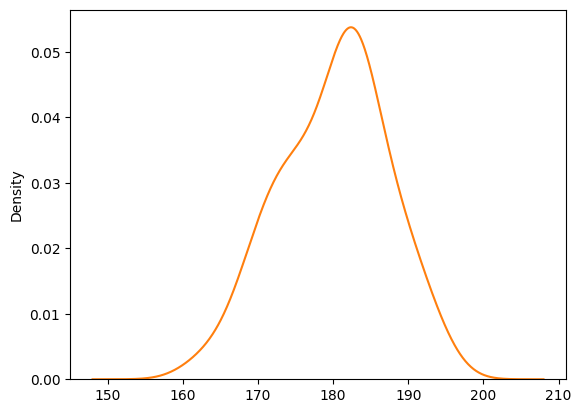

In [ ]:
ax = heights['height'].plot.hist(density=True, bins=range(1,10))
# Density Estimation
heights['height'].plot.density(ax=ax)

# 1.6. Search Bin, Category data
- mode(최빈값), expected value(기댓값), bar chart, pie chart(원에서 부채꼴 모양으로 비율 시각화)
- 'Counter' library를 통해서 빈도 수를 계산

# 1.7. Correlation (상관관계)
- Correlation coefficient(상관계수) : 변수들 사이에 어떤 관계가 있는지 (-1(관계x) ~ +1(관계o)
- Correlation Matrix(상관행렬) : 각 변수 쌍 사이에 상관계수를 나타내는 Matrix
- Scatterplot(산점도)

# 1.8. 두 개 이상의 변수 탐색하기
- Contingency table(분할표) : 두 개 이상인 변수들의 빈도수를 기록한 범주형 표
- Violin plot = Box plot + Density Prediction
- 범주형 변수 : 범주의 수가 제한된 변수 Ex. Gender(M/F)
- 상관분석 : 2개 이상 변수들을 비교하는 분석 (이변량분석(bivariable analysis), 다변량분석(multivariate analysis))

In [2]:
tax = pd.read_csv('/content/drive/MyDrive/Colab_Note/csv/kc_tax.csv')

In [3]:
tax.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0


In [36]:
# 극단적인 값들을 제거함으로써 주요 부분에만 집중
tax = tax.loc[(tax.TaxAssessedValue < 750000) &
              (tax.SqFtTotLiving > 100) &
              (tax.SqFtTotLiving < 3500), :]

Text(0, 0.5, 'Tax-Accessed Value')

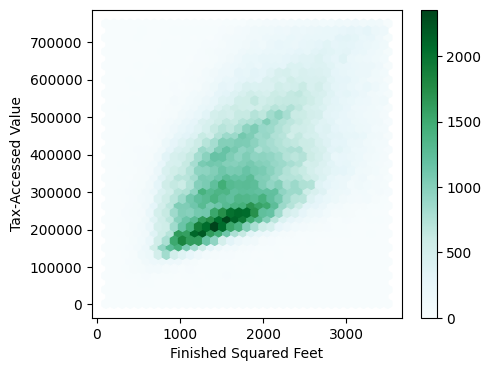

In [39]:
ax = tax.plot(kind='hexbin', gridsize=35,
              x='SqFtTotLiving', y='TaxAssessedValue',
              sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Squared Feet')
ax.set_ylabel('Tax-Accessed Value')

KeyboardInterrupt: ignored

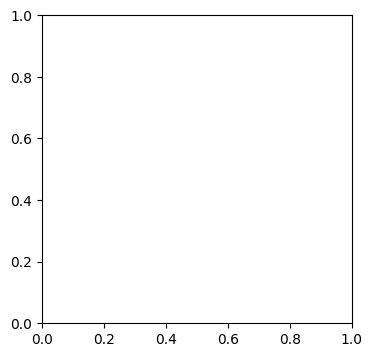

In [ ]:
# kdeplot : 등고선
fig, ax = plt.subplots(figsize=(4, 4))
ax = sns.kdeplot(data=tax, x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)

In [5]:
loan = pd.read_csv('/content/drive/MyDrive/Colab_Note/csv/loan_data.csv')

In [6]:
loan.head()

,Unnamed: 0,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,...,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
0,1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,...,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
1,2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,...,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
2,3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,...,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
3,4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,...,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
4,5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,...,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55


In [7]:
crosstab = loan.pivot_table(index='grade', columns='status',
                            aggfunc=lambda x: len(x), margins=True)

# pandas.pivot_table() Parameter
1. Essential
- index=None : 각 행(row)는 무엇으로 정의할지
- columns=None : 각 열(column)은 무엇으로 정의할지
- values=None : 각 Cell을 어떤 숫자로 계산할지
- aggfunc='mean', 'sum', 'nunique' 등 : 계산을 어떻게 할지
                   
2. Plus
- fill_value=None
- margins=False
- dropna=True
- margins_name='All'
- observed=False
- sort=True

In [24]:
players = pd.read_csv('/content/drive/MyDrive/Colab_Note/csv/all_players.csv')
players.head()

,Team,JerseyNo,Player,Position,Apearances,Substitutions,Goals,Penalties,YellowCards,RedCards
0,Arsenal,7,Bukayo혻Saka,Defender/Midfielder,40,3,12,2,6.0,0.0
1,Arsenal,6,Gabriel,Defender,37,1,5,0,7.0,1.0
2,Arsenal,32,Aaron혻Ramsdale,Goalkeeper,37,0,0,0,1.0,0.0
3,Arsenal,4,Ben혻White,Defender,37,0,0,0,3.0,0.0
4,Arsenal,8,Martin혻Odegaard,Midfielder,36,4,7,0,4.0,0.0


In [27]:
players.pivot_table(index=['Team'],
                    columns=['Position'],
                    values=['YellowCards'],
                    aggfunc=np.mean)

YellowCards                                       \
Position                    Defender Defender/Forward Defender/Midfielder   
Team                                                                        
Arsenal                     3.333333              NaN            3.500000   
Aston Villa                 2.800000              NaN            3.750000   
Brentford                   2.428571              NaN            2.666667   
Brighton and Hove Albion    3.375000              NaN            1.571429   
Burnley                     3.250000              2.0            3.500000   
Chelsea                     3.000000              NaN            4.600000   
Crystal Palace              2.000000              NaN            2.500000   
Everton                     0.857143              NaN            3.833333   
Leeds United                4.285714              NaN            4.500000   
Leicester City              3.666667              NaN            2.875000   
Liverpool                   2.250000              NaN            3.500000   
Manchester City             2.900000              NaN            2.333333   
Manchester United           4.250000              NaN            1.750000   
Newcastle United            3.250000              NaN            2.000000   
Norwich City                3.875000              NaN            2.500000   
Southampton                 4.166667              NaN            4.000000   
Tottenham Hotspur           3.000000              NaN            2.600000   
Watford                     1.400000              NaN            1.750000   
West Ham United             2.111111              NaN            2.000000   
Wolverhampton Wanderers     1.750000              NaN            3.750000   

                                                                           \
Position                 Defender/Midfielder/Forward   Forward Goalkeeper   
Team                                                                        
Arsenal                                          NaN  2.000000   0.500000   
Aston Villa                                      3.0  1.833333   1.333333   
Brentford                                        NaN  1.600000   0.333333   
Brighton and Hove Albion                         NaN  1.166667   1.000000   
Burnley                                          NaN  2.400000   0.500000   
Chelsea                                          NaN  0.666667   1.333333   
Crystal Palace                                   NaN  2.750000   1.500000   
Everton                                          NaN  0.600000   1.000000   
Leeds United                                     NaN  4.200000   1.000000   
Leicester City                                   NaN  2.500000   0.500000   
Liverpool                                        NaN  0.000000   0.333333   
Manchester City                                  NaN  1.666667   1.666667   
Manchester United                               10.0  0.750000   0.000000   
Newcastle United                                 NaN  1.666667   0.666667   
Norwich City                                     NaN  2.333333   0.666667   
Southampton                                      NaN  1.000000   1.333333   
Tottenham Hotspur                                NaN  1.500000   1.000000   
Watford                                          NaN  2.166667   0.000000   
West Ham United                                  NaN       NaN   1.000000   
Wolverhampton Wanderers                          NaN  2.666667   1.500000   

                                                        
Position                 Midfielder Midfielder/Forward  
Team                                                    
Arsenal                    2.428571           0.000000  
Aston Villa                1.933333           3.000000  
Brentford                  1.888889           3.500000  
Brighton and Hove Albion   2.714286           1.500000  
Burnley                    4.333333           2.000000  
Chelsea                  

In [30]:
players.pivot_table(index=['Team'],
                    columns=['Position'],
                    values=['YellowCards'],
                    aggfunc=[np.mean])

mean                                       \
                         YellowCards                                        
Position                    Defender Defender/Forward Defender/Midfielder   
Team                                                                        
Arsenal                     3.333333              NaN            3.500000   
Aston Villa                 2.800000              NaN            3.750000   
Brentford                   2.428571              NaN            2.666667   
Brighton and Hove Albion    3.375000              NaN            1.571429   
Burnley                     3.250000              2.0            3.500000   
Chelsea                     3.000000              NaN            4.600000   
Crystal Palace              2.000000              NaN            2.500000   
Everton                     0.857143              NaN            3.833333   
Leeds United                4.285714              NaN            4.500000   
Leicester City              3.666667              NaN            2.875000   
Liverpool                   2.250000              NaN            3.500000   
Manchester City             2.900000              NaN            2.333333   
Manchester United           4.250000              NaN            1.750000   
Newcastle United            3.250000              NaN            2.000000   
Norwich City                3.875000              NaN            2.500000   
Southampton                 4.166667              NaN            4.000000   
Tottenham Hotspur           3.000000              NaN            2.600000   
Watford                     1.400000              NaN            1.750000   
West Ham United             2.111111              NaN            2.000000   
Wolverhampton Wanderers     1.750000              NaN            3.750000   

                                                                           \
                                                                            
Position                 Defender/Midfielder/Forward   Forward Goalkeeper   
Team                                                                        
Arsenal                                          NaN  2.000000   0.500000   
Aston Villa                                      3.0  1.833333   1.333333   
Brentford                                        NaN  1.600000   0.333333   
Brighton and Hove Albion                         NaN  1.166667   1.000000   
Burnley                                          NaN  2.400000   0.500000   
Chelsea                                          NaN  0.666667   1.333333   
Crystal Palace                                   NaN  2.750000   1.500000   
Everton                                          NaN  0.600000   1.000000   
Leeds United                                     NaN  4.200000   1.000000   
Leicester City                                   NaN  2.500000   0.500000   
Liverpool                                        NaN  0.000000   0.333333   
Manchester City                                  NaN  1.666667   1.666667   
Manchester United                               10.0  0.750000   0.000000   
Newcastle United                                 NaN  1.666667   0.666667   
Norwich City                                     NaN  2.333333   0.666667   
Southampton                                      NaN  1.000000   1.333333   
Tottenham Hotspur                                NaN  1.500000   1.000000   
Watford                                          NaN  2.166667   0.000000   
West Ham United                                  NaN       NaN   1.000000   
Wolverhampton Wanderers                          NaN  2.666667   1.500000   

                                                        
                                                        
Position                 Midfielder Midfielder/Forward  
Team                                                    
Arsenal                    2.428571           0.000000  
Aston Villa                1.933333           3.0